# Logistic Regression
* for `Classification`

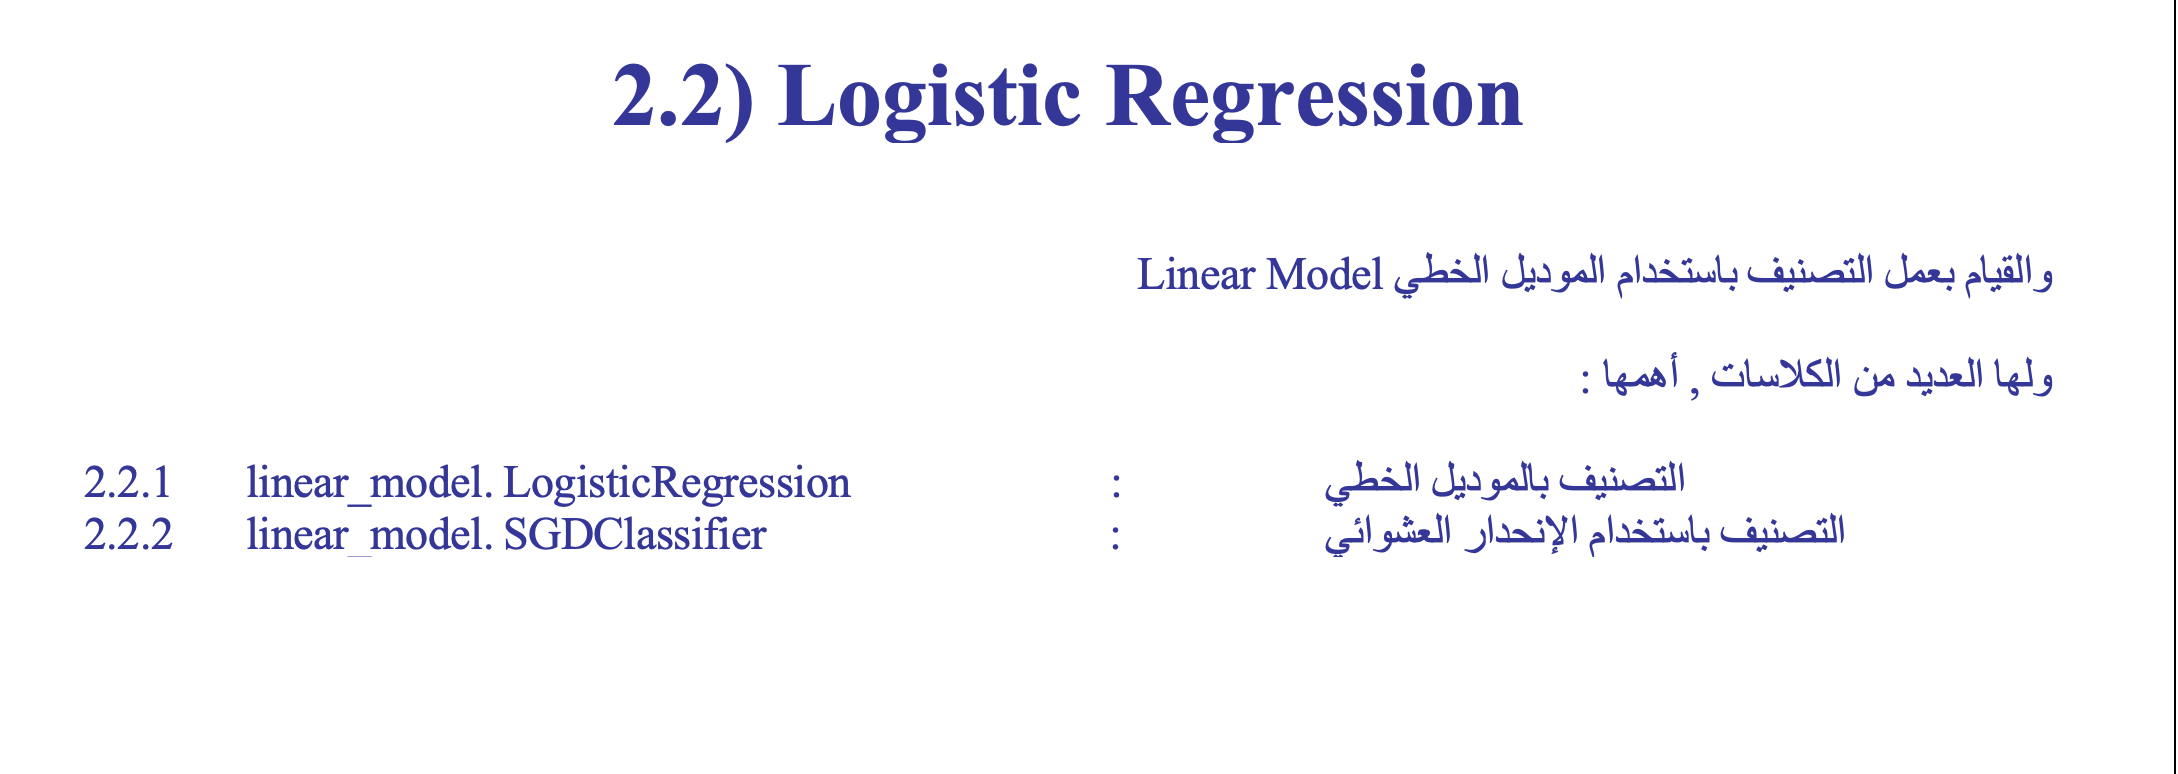

In [1]:
from IPython.display import Image
Image(filename='LG.png')

## 1.1- Logistic Regression
* Binary Classification

In [2]:
#Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import zero_one_loss

In [4]:
#load breast cancer data
data = load_breast_cancer()
X = data.data
y = data.target

In [7]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)


In [17]:
#Applying LogisticRegression Model 

'''
#linear_model.LogisticRegression(penalty='l2’,dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,
#                                class_weight=None,random_state=None,solver='warn’,max_iter=100,
#                                multi_class='warn’, verbose=0,warm_start=False, n_jobs=None)
'''


LogisticRegressionModel = LogisticRegression(random_state=33)
LogisticRegressionModel.fit(X_train, y_train)


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=33, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_) # [0, 1] binary calssificatoin
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)


LogisticRegressionModel Train Score is :  0.958005249343832
LogisticRegressionModel Test Score is :  0.9627659574468085
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [21]


In [24]:
#Calculating Prediction
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)

print('Predicted Value is : ' , y_pred[:10])

print('True Value is :      ' , y_train[:10])

print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])


Predicted Value is :  [0 0 1 0 1 1 1 1 0 1]
True Value is :       [0 1 0 0 1 1 1 0 0 0]
Prediction Probabilities Value for LogisticRegressionModel is :  [[9.77283127e-01 2.27168725e-02]
 [9.99999985e-01 1.51716474e-08]
 [3.97860088e-02 9.60213991e-01]
 [1.00000000e+00 4.03706922e-10]
 [2.97174376e-01 7.02825624e-01]
 [1.20302227e-01 8.79697773e-01]
 [6.80629553e-04 9.99319370e-01]
 [7.31384759e-02 9.26861524e-01]
 [9.95084675e-01 4.91532457e-03]
 [2.76531352e-03 9.97234686e-01]]


[[ 64   4]
 [  3 117]]


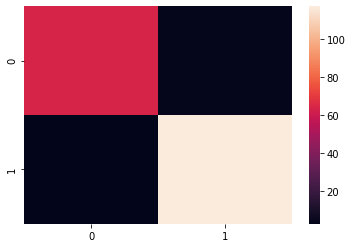

In [30]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print(CM)
# drawing confusion matrix
sns.heatmap(CM)


In [55]:
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred)
print('Accuracy Score is : ', AccScore)

AccScore = accuracy_score(y_test, y_pred, normalize= False) # number of true
print('Accuracy Score is : ', AccScore)


Accuracy Score is :  0.9627659574468085
Accuracy Score is :  181


In [38]:
#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2  
# recall_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)
RecallScore = recall_score(y_test, y_pred)
print('Recall Score is : ', RecallScore)

RecallScore = recall_score(y_test, y_pred , average='micro')
print('Recall Score is : ', RecallScore)


Recall Score is :  0.975
Recall Score is :  0.9627659574468085


In [39]:
#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  
# precision_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’,sample_weight=None)
PrecisionScore = precision_score(y_test, y_pred) #it can be : binary,macro,weighted,samples
print('Precision Score is : ', PrecisionScore)

PrecisionScore = precision_score(y_test, y_pred, average='micro') 
print('Precision Score is : ', PrecisionScore)


Precision Score is :  0.9669421487603306
Precision Score is :  0.9627659574468085


In [42]:
# Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred) #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1Score = f1_score(y_test, y_pred, average='micro') 
print('F1 Score is : ', F1Score)


F1 Score is :  0.970954356846473
F1 Score is :  0.9627659574468085


In [43]:
#Calculating Precision recall Curve :  
# precision_recall_curve(y_true, probas_pred, pos_label=None, sample_weight=None)

PrecisionValue, RecallValue, ThresholdsValue = precision_recall_curve(y_test,y_pred)
print('Precision Value is : ', PrecisionValue)
print('Recall Value is : ', RecallValue)
print('Thresholds Value is : ', ThresholdsValue)

Precision Value is :  [0.63829787 0.96694215 1.        ]
Recall Value is :  [1.    0.975 0.   ]
Thresholds Value is :  [0 1]


In [48]:
#Calculating classification Report :  
#classification_report(y_true, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is:\n', ClassificationReport )


Classification Report is:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.97      0.97      0.97       120

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



In [51]:
#Calculating Area Under the Curve :  

fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)

AUC Value  :  0.9580882352941177


In [52]:
#Calculating Receiver Operating Characteristic :  
#roc_curve(y_true, y_score, pos_label=None, sample_weight=None,drop_intermediate=True)

fprValue, tprValue, thresholdsValue = roc_curve(y_test,y_pred)
print('fpr Value  : ', fprValue)
print('tpr Value  : ', tprValue)
print('thresholds Value  : ', thresholdsValue)

fpr Value  :  [0.         0.05882353 1.        ]
tpr Value  :  [0.    0.975 1.   ]
thresholds Value  :  [2 1 0]


In [50]:
#Calculating ROC AUC Score:  
#roc_auc_score(y_true, y_score, average=’macro’, sample_weight=None,max_fpr=None)

ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') #it can be : macro,weighted,samples
print('ROCAUC Score : ', ROCAUCScore)

ROCAUC Score :  0.9580882352941177


In [54]:
#Calculating Zero One Loss:  
#zero_one_loss(y_true, y_pred, normalize = True, sample_weight = None)
ZeroOneLossValue = zero_one_loss(y_test,y_pred) 
print('Zero One Loss Value : ', ZeroOneLossValue )

ZeroOneLossValue = zero_one_loss(y_test,y_pred,normalize=False) # number of false
print('Zero One Loss Value : ', ZeroOneLossValue )

Zero One Loss Value :  0.037234042553191515
Zero One Loss Value :  7


## 1.1- Logistic Regression
* Binary Classification

In [66]:
import pandas as pd

dataset = pd.read_csv('heart.csv')

dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [80]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.fit(X_test)

In [81]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression(random_state=0)
logisticRegression.fit(X_train, y_train)

# Predicting the Test set results
y_pred = logisticRegression.predict(X_test)

/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[24  9]
 [ 4 39]]


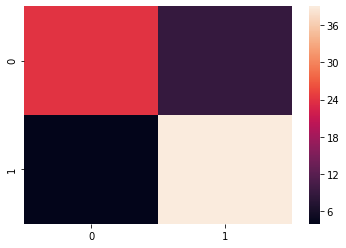

In [88]:
#  Confusion Matrix: the important one for Classification
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print(CM)

# draw it
import seaborn as sns
sns.heatmap(CM)

In [94]:
# Evaluation Metrix
# the best 2 for classification
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.8289473684210527
0.8571428571428572


## 1.1- Logistic Regression
* Multi Class Classification

In [64]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
# clf = LogisticRegression(random_state=10, solver='lbfgs' , max_iter= 1000 , C = 0.5 , tol = 0.01)
# clf = LogisticRegression(random_state=10, solver='liblinear')
clf = LogisticRegression(random_state=10, solver='saga')

clf.fit(X, y)
clf.predict(X[:2, :])
clf.predict_proba(X[:2, :])

score = clf.score(X, y)

print('score = ' , score)
print('No of iterations = ' , clf.n_iter_)
print('Classes = ' , clf.classes_)

 

score =  0.9666666666666667
No of iterations =  [100 100 100]
Classes =  [0 1 2]


/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/fox/anaconda3/envs/newEnv/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# 2- SGD Classifier

In [95]:
import pandas as pd

dataset = pd.read_csv('heart.csv')
dataset.head(20)

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [96]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [102]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

# Predicting the Test set results
y_pred = sgd.predict(X_test)

In [103]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[26,  7],
       [ 9, 34]])

In [104]:
from sklearn.metrics import f1_score, accuracy_score
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='micro'))
 

0.7894736842105263
0.7894736842105263
